# Comp 551 : Mini Project 3


This notebook contains the code for algorithm implementation and experiments for MiniProject 3

#### Loading modules

In [ ]:
import numpy as np
import pandas as pd
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
from keras.datasets import fashion_mnist
warnings.filterwarnings('ignore')

# Task 1: Acquire, preprocess, and analyze the data

In [ ]:
def normalize(x, axis=0):
  x= x - np.mean(x, axis=0) 
  x= x/ np.std(x, axis=0)
  return(x)

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
d1, d2, d3 = x_train.shape
x_train=  x_train.reshape((d1, d2*d3))
d1, d2, d3 = x_test.shape
x_test = x_test.reshape((d1, d2*d3))

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
x_train_raw=x_train
x_test_raw=x_test

In [ ]:
x_train= normalize(x_train)
x_test = normalize(x_test)

In [ ]:
y_train = np.array(pd.get_dummies(y_train))
y_test = np.array(pd.get_dummies(y_test))

In [ ]:
x_train[1:10, 1:10]

array([[-0.02322333, -0.03917806, -0.04132172, -0.05764574,  0.10043738,
        -0.09887846, -0.15665259, -0.23908034, -0.37782706],
       [-0.02322333, -0.03917806, -0.04132172, -0.05764574, -0.07116733,
        -0.09887846, -0.15665259, -0.23908034,  0.19802309],
       [-0.02322333, -0.03917806, -0.04132172, -0.05764574, -0.07116733,
        -0.09887846, -0.15665259,  1.14539285,  2.13497356],
       [-0.02322333, -0.03917806, -0.04132172, -0.05764574, -0.07116733,
        -0.09887846, -0.15665259, -0.23908034, -0.37782706],
       [-0.02322333, -0.03917806, -0.04132172,  0.17322968, -0.07116733,
        -0.09887846, -0.15665259, -0.23908034,  0.19802309],
       [-0.02322333, -0.03917806, -0.04132172, -0.05764574, -0.07116733,
        -0.09887846, -0.15665259, -0.23908034, -0.37782706],
       [-0.02322333, -0.03917806, -0.04132172, -0.05764574,  0.10043738,
         0.02146044, -0.15665259, -0.23908034, -0.37782706],
       [-0.02322333, -0.03917806, -0.04132172, -0.05764574, -0

In [ ]:
x_train_raw[1:10,1:10]

array([[ 0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 22],
       [ 0,  0,  0,  0,  0,  0,  0, 33, 96],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 22],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=uint8)

In [ ]:
x_test[1:10, 1:10]

array([[-0.02066217, -0.02378436, -0.03286191, -0.04889502, -0.06284215,
        -0.0932637 , -0.15313442, -0.22980777, -0.37443952],
       [-0.02066217, -0.02378436, -0.03286191, -0.04889502, -0.06284215,
        -0.0932637 , -0.15313442, -0.18605403, -0.37443952],
       [-0.02066217, -0.02378436, -0.03286191, -0.04889502, -0.06284215,
        -0.0932637 , -0.15313442, -0.22980777,  0.17689793],
       [-0.02066217, -0.02378436,  0.91416727, -0.04889502,  0.10577107,
         0.04184234, -0.15313442, -0.22980777, -0.37443952],
       [-0.02066217, -0.02378436, -0.03286191, -0.04889502, -0.06284215,
        -0.0932637 , -0.15313442, -0.22980777, -0.37443952],
       [-0.02066217, -0.02378436, -0.03286191, -0.04889502, -0.06284215,
        -0.0932637 , -0.15313442, -0.18605403, -0.37443952],
       [-0.02066217, -0.02378436, -0.03286191, -0.04889502, -0.06284215,
        -0.0932637 , -0.15313442, -0.14230029, -0.29567703],
       [-0.02066217, -0.02378436, -0.03286191, -0.04889502, -0

In [ ]:
x_test_raw[1:10,1:10]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21],
       [ 0,  0,  2,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=uint8)

# Task 2:  Implement the models

Tasks to do: 

- add bias (DONE)
- Multiclass classification (DONE)

- plot accuracy  (DONE)

- Implement mini batch Stochastic Gradient Descent (DONE)
- Add Dropout (DONE)
- Automatize number of hidden layers (DONE)
  - MLP with no hidden layers ( softmax regression) 
  - MLP with a single hidden layer having 128 units 
  - MLP with 2 hidden layers each having 128 units with ReLU activations. 

#### Implement methods

In [ ]:
def softmax(z,axis=1):
  e_z = np.exp(z - np.max(z, axis=axis, keepdims=True) )
  return( e_z / e_z.sum(axis=axis, keepdims=True)  )

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))
dlogistic = lambda q: logistic(q) * (1-logistic(q)) 

In [ ]:
tanh = lambda x: 2* logistic(x) -1
dtanh = lambda x: 1 - (tanh(x)**2)

In [ ]:
relu= lambda x : 1* x * (x>0)
drelu = lambda x: 1* (x> 0)

In [ ]:
def lrelu(x,gamma=0.01):
  return (((x > 0) * x) + ((x <= 0) * x * gamma))

def dlrelu(x, gamma=0.01):
  dx = np.ones_like(x)
  dx[x < 0] = gamma 
  return(dx)

In [ ]:
test=np.array([1,100,-1, -13.4])

In [ ]:
softmax(test,axis=0)

array([1.01122149e-43, 1.00000000e+00, 1.36853947e-44, 5.63645121e-50])

In [ ]:
relu(test)

array([  1., 100.,  -0.,  -0.])

In [ ]:
tanh(test)

array([ 0.46211716,  1.        , -0.46211716, -0.99999697])

In [ ]:
test=np.array([[1,100,-1,-13.4], [-2,0,1.2,4.4] ])

In [ ]:
test

array([[  1. , 100. ,  -1. , -13.4],
       [ -2. ,   0. ,   1.2,   4.4]])

In [ ]:
softmax(test)

array([[1.01122149e-43, 1.00000000e+00, 1.36853947e-44, 5.63645121e-50],
       [1.57538214e-03, 1.16405870e-02, 3.86481098e-02, 9.48135921e-01]])

In [ ]:
softmax(test)[1:].sum()

1.0

In [ ]:
softmax(test).sum(axis=1)

array([1., 1.])

In [ ]:
softmax(test,axis=0)

array([[9.52574127e-01, 1.00000000e+00, 9.97504891e-02, 1.86019389e-08],
       [4.74258732e-02, 3.72007598e-44, 9.00249511e-01, 9.99999981e-01]])

In [ ]:
softmax(test,axis=0).sum(axis=0)

array([1., 1., 1., 1.])

In [ ]:
tanh(test)

array([[ 0.46211716,  1.        , -0.46211716, -0.99999697],
       [-0.76159416,  0.        ,  0.53704957,  0.97574313]])

In [ ]:
dtanh(test)

array([[7.86447733e-01, 0.00000000e+00, 7.86447733e-01, 6.06055808e-06],
       [4.19974342e-01, 1.00000000e+00, 7.11577763e-01, 4.79253442e-02]])

In [ ]:
lrelu(test)

array([[ 1.00e+00,  1.00e+02, -1.00e-02, -1.34e-01],
       [-2.00e-02,  0.00e+00,  1.20e+00,  4.40e+00]])

In [ ]:
dlrelu(test)

array([[1.  , 1.  , 0.01, 0.01],
       [0.01, 1.  , 1.  , 1.  ]])

In [ ]:
def evaluate_acc(y, yh):
    n_classes = np.max(y) + 1
    c_matrix = np.zeros((n_classes, n_classes))
    for c1 in range(n_classes):
        for c2 in range(n_classes):
            #(y==c1)*(yh==c2) is 1 when both conditions are true or 0
            c_matrix[c1, c2] = np.sum((y==c1)*(yh==c2))
    accuracy=np.sum(np.diag(c_matrix))/np.sum(c_matrix)
    return accuracy

In [ ]:
def predict(x, params, add_bias, activation, n_layers):
    if n_layers == 0:
      w = params[0]
      probs= softmax(np.dot(x, w)) # N x C
    if n_layers == 1:
      v, w = params
      z = activation(np.dot(x, v))  # N x M
      if add_bias:
        z = np.column_stack([z,np.ones(z.shape[0])])
      probs = softmax(np.dot(z, w))#N x C
    if n_layers == 2:
      v, o, w = params
      z = activation(np.dot(x, v)) #N x M    
      if add_bias:
        z = np.column_stack([z,np.ones(z.shape[0])])
      r = activation(np.dot(z, o)) # N x M
      if add_bias:
        r = np.column_stack([r,np.ones(r.shape[0])])
      probs = softmax(np.dot(r, w)) # N x C
    return probs

In [ ]:
def cost(y, probs):
  return - (y * np.log(probs)).sum()

In [ ]:
class MLP:
    
    def __init__(self, add_bias=True, M = [128], act_fn="relu",n_layers=1,keep_prob=1):
        self.M = M
        self.add_bias=add_bias
        self.act_fn=act_fn
        self.n_layers=n_layers
        self.keep_prob=keep_prob
        # Choosing activation function
        if act_fn == "logistic":
          self.activation=logistic
          self.dactivation= dlogistic
        if act_fn == "relu":
          self.activation=relu
          self.dactivation=drelu
        if act_fn == "tanh":
          self.activation=tanh
          self.dactivation=dtanh
        if act_fn == "lrelu":
          self.activation=lrelu
          self.dactivation=dlrelu
        
    def fit(self, x, y, x_test, y_test, optimizer):
        if self.add_bias:
            x = np.column_stack([x,np.ones(x.shape[0])])
            x_test= np.column_stack([x_test,np.ones(x_test.shape[0])])
        N,D = x.shape
        C = y.shape[1] 
        def gradient(x, #N x D 
                     y, #N x C
                     params
                     ):
            N,D = x.shape

            if self.n_layers == 0:
              w = params[0]
              # Forward pass
              yh = softmax(np.dot(x, w))#N x C
              # Backprop
              dy = yh - y #N x C
              dw = np.dot(x.T, dy)/N # D x C
              dparams= [dw]

            if self.n_layers == 1:
              v, w = params
              # Forward pass
              q = np.dot(x, v) #N x M
              z = self.activation(q) #N x M
              mask_z = np.random.binomial(1, self.keep_prob, size=z.shape)/self.keep_prob
              z = z * mask_z # Dropout for z
              if self.add_bias:
                z = np.column_stack([z,np.ones(z.shape[0])])
              yh = softmax(np.dot(z, w))#N x C
              # Backprop   
              dy = yh - y #N x C 
              dw = np.dot(z.T, dy)/N # M x C
              dz =  np.dot(dy, w.T) # N x M          
              dz_dq= self.dactivation(q) # N x M 
              if self.add_bias:
                dz= dz[:,0:(dz.shape[1]-1)] #Last column is bias, no interest for backprop of dV
              dz = dz * mask_z #Dropout for dz
              dv = np.dot(x.T, dz * dz_dq )/N #D x M            
              dparams = [dv, dw]

            if self.n_layers == 2:
              v, o, w = params
              # Forward pass
              q = np.dot(x, v) #N x M
              z = self.activation(q) #N x M  
              mask_z = np.random.binomial(1, self.keep_prob, size=z.shape)/self.keep_prob
              z = z * mask_z # Dropout for z  
              if self.add_bias:
                z = np.column_stack([z,np.ones(z.shape[0])])
              p = np.dot(z,o) # N x M
              r = self.activation(p) # N x M
              mask_r = np.random.binomial(1, self.keep_prob, size=r.shape)/self.keep_prob
              r = r * mask_r # Dropout for r
              if self.add_bias:
                r = np.column_stack([r,np.ones(r.shape[0])])
              yh = softmax(np.dot(r, w)) # N x C
              # Backprop   
              dy = yh - y #N x C 
              dw = np.dot(r.T, dy)/N # M x C
              dr = np.dot(dy, w.T) # N x M
              if self.add_bias:
                dr= dr[:,0:(dr.shape[1]-1)] #Last column is bias, no interest for backprop
              dr = dr * mask_r #Dropout for dr
              dr_dp = self.dactivation(p) # N x M
              dp = dr * dr_dp # N x M
              do = np.dot(z.T, dp)/N #M x M
              dz = np.dot(dp, o.T)
              if self.add_bias:
                dz= dz[:,0:(dz.shape[1]-1)] #Last column is bias, no interest for backprop of dV
              dz = dz * mask_z #Dropout for dz
              dz_dq= self.dactivation(q)
              dv = np.dot(x.T, dz * dz_dq)/N #D x M  
              dparams = [dv, do, dw]
            
            return dparams
        
        # Initialize parameters

        if self.n_layers == 0:
          w = np.random.randn(D,C) * .01 
          params0 = [w]        

        if self.n_layers == 1:
          M = self.M[0]
          if self.add_bias:
            w= np.random.randn((M+1),C) * .01
          else:
            w= np.random.randn(M,C) * .01
          v = np.random.randn(D,M) * .01 
          params0 = [v,w]
        
        if self.n_layers == 2:
          M1,M2=self.M
          if self.add_bias:
            w= np.random.randn((M2+1),C) * .01
            o= np.random.randn((M1+1), M2) * .01
          else:
            w= np.random.randn(M2,C) * .01
            o= np.random.randn(M1, M2) * .01
          v = np.random.randn(D,M1) * .01 
          params0 = [v,o,w]
        
        print("initial parameters shape:")
        for param in params0:
          print(param.shape)
        
        # Optimization
        self.params,self.training_accuracy,self.test_accuracy,self.loss  = optimizer.run(gradient, x, y, x_test,y_test, params0,self.add_bias, self.activation, self.n_layers)
        return self
    

    def predict(self, x):
        if self.add_bias:
          x = np.column_stack([x,np.ones(x.shape[0])])
        if self.n_layers == 0:
          w = self.params[0]
          yh = softmax(np.dot(x, w)) # N x C
        if self.n_layers == 1:         
          v, w = self.params
          z = self.activation(np.dot(x, v))  # N x M
          if self.add_bias:
            z = np.column_stack([z,np.ones(z.shape[0])])
          yh = softmax(np.dot(z, w))#N x C
        if self.n_layers == 2:
          v, o, w = self.params
          z = self.activation(np.dot(x, v)) #N x M    
          if self.add_bias:
            z = np.column_stack([z,np.ones(z.shape[0])])
          r = self.activation(np.dot(z, o)) # N x M
          if self.add_bias:
            r = np.column_stack([r,np.ones(r.shape[0])])
          yh = softmax(np.dot(r, w)) # N x C
        yh = np.argmax(yh,axis=1) # Getting max probability
        return yh

In [ ]:
class SGD:
  
    def __init__(self, learning_rate=.001, momentum=0.9, max_iters=1e4, epsilon=1e-8, batch_size=32, shuffle=True):
        self.learning_rate = learning_rate
        self.momentum= momentum
        self.max_iters = max_iters
        self.epsilon = epsilon
        self.batch_size=batch_size
        self.shuffle=shuffle

    def create_minibatch(self, x,y):
      if self.shuffle:
        inds = np.random.permutation(x.shape[0])
      else:
        inds= np.arange(x.shape[0])
      for start_index in range(0, x.shape[0], self.batch_size):
        end_index = min(start_index + self.batch_size, x.shape[0])
        minibatch_inds= inds[start_index:end_index]
        yield x[minibatch_inds], y[minibatch_inds] 

    def run(self, gradient_fn, x, y, x_test, y_test, params,add_bias,activation, n_layers):
        norms = np.array([np.inf])
        t = 1
        training_accuracy=[]
        test_accuracy=[]
        loss=[]
        while np.any(norms > self.epsilon) and t < self.max_iters:
            for batch in self.create_minibatch(x,y):
              x_batch, y_batch = batch
              # calculate gradient
              grad = gradient_fn(x_batch, y_batch, params)
              # Initialize change
              change=np.zeros(len(params)).tolist()
              # Update parameters
              for p in range(len(params)):
                  change[p] = self.momentum * change[p] + (1 - self.momentum) * grad[p]  
                  params[p] = params[p] - self.learning_rate * change[p]
            t += 1
            norms = np.array([np.linalg.norm(g) for g in grad])
            # Training accuracy
            training_probs=predict(x, params, add_bias, activation, n_layers)
            training_yh = np.argmax(training_probs,1)
            training_accuracy.append(evaluate_acc(np.argmax(y, axis=1), training_yh ))
            # Test accuracy
            test_probs=predict(x_test, params, add_bias, activation, n_layers)
            test_yh = np.argmax(test_probs,1)
            test_accuracy.append(evaluate_acc(np.argmax(y_test, axis=1), test_yh ))
            # CE loss 
            loss.append(cost(y, training_probs))
        print("max epoch:", t)
        return params,training_accuracy,test_accuracy,loss

#### Performing a test with Iris dataset

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_iris()

x_iris, y_iris = dataset['data'], dataset['target']

x_iris_train,x_iris_test,y_iris_train,y_iris_test=train_test_split(x_iris,y_iris,test_size=0.33,random_state=42)
y_iris_train= np.array(pd.get_dummies(y_iris_train))
y_iris_test= np.array(pd.get_dummies(y_iris_test))

x_iris_train= normalize(x_iris_train)
x_iris_test = normalize(x_iris_test)

print(x_iris_train.shape)
print(y_iris_train.shape)

print(x_iris_test.shape)
print(y_iris_test.shape)


(100, 4)
(100, 3)
(50, 4)
(50, 3)


initial parameters shape:
(5, 3)
max epoch: 2000
[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
test accuracy:
0.98


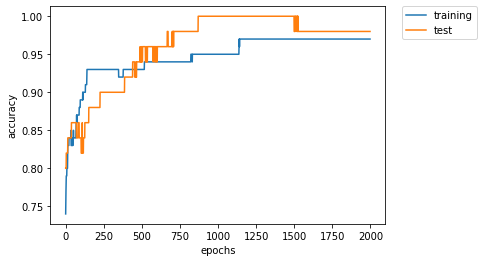

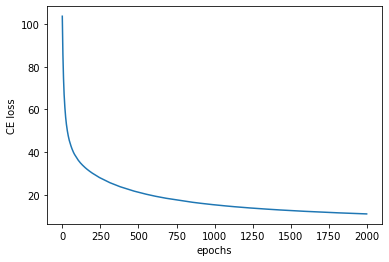

In [ ]:
model = MLP(M=[17,15],add_bias=True, act_fn="lrelu", n_layers=0,keep_prob=1)
optimizer = SGD(learning_rate=1e-1, momentum=0.90, max_iters=2000, batch_size=16)
yh=model.fit(x_iris_train, y_iris_train, x_iris_test, y_iris_test, optimizer).predict(x_iris_test)
print(yh)

print('test accuracy:')
print(evaluate_acc(np.argmax(y_iris_test, axis=1), yh) )

plt.plot(model.training_accuracy, label="training")
plt.plot(model.test_accuracy, label="test")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.plot(model.loss)
plt.xlabel('epochs')
plt.ylabel('CE loss')
plt.show()

# Task 3: Run the experiments

## Task 3.1

### Model with no hidden layers

lr: 1
initial parameters shape:
(785, 10)
max epoch: 30
test accuracy: 0.8124


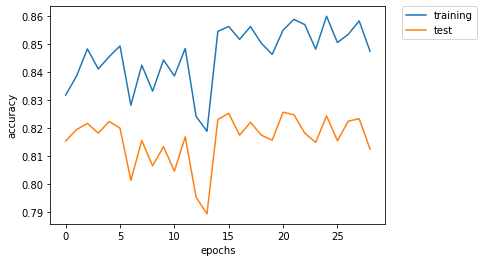

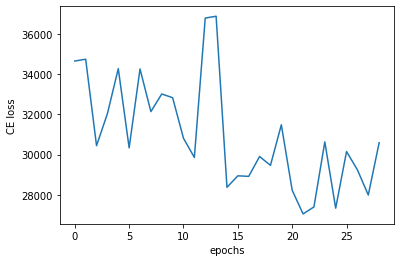

lr: 0.1
initial parameters shape:
(785, 10)
max epoch: 30
test accuracy: 0.8423


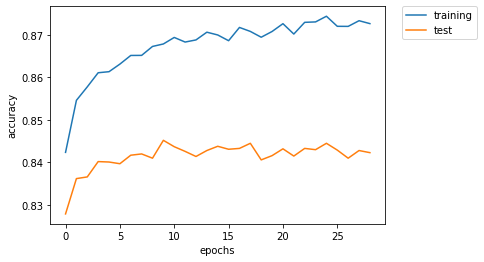

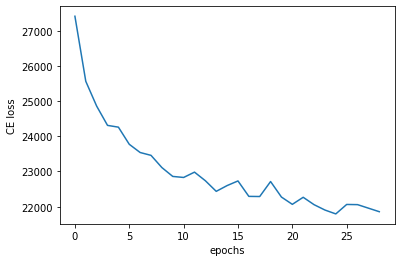

lr: 0.01
initial parameters shape:
(785, 10)
max epoch: 30
test accuracy: 0.8385


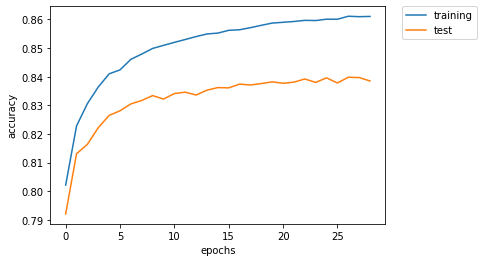

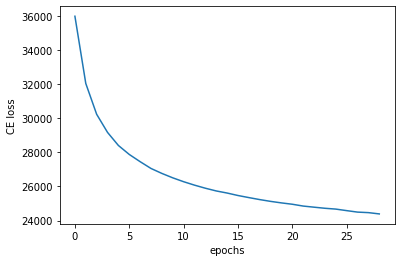

lr: 0.001
initial parameters shape:
(785, 10)
max epoch: 30
test accuracy: 0.8167


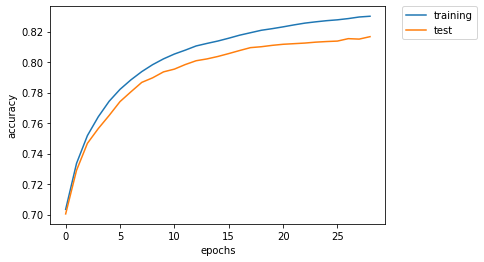

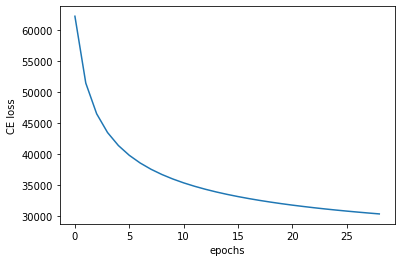

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer0=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(add_bias=True, act_fn="relu", n_layers=0, keep_prob=1)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train, y_train, x_test, y_test, optimizer).predict(x_test)
  res_model_nlayer0.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

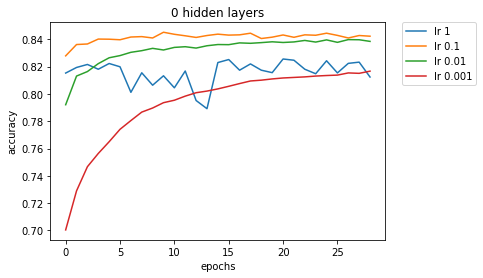

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer0[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('0 hidden layers')
plt.show()

### Model with 1 hidden layer

lr: 1
initial parameters shape:
(785, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8789


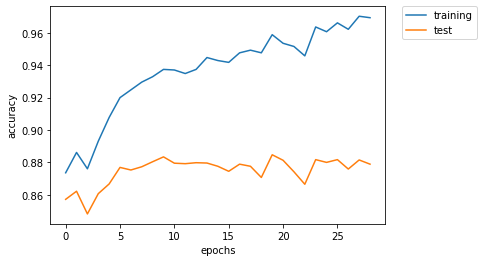

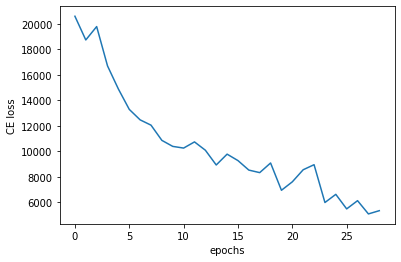

lr: 0.1
initial parameters shape:
(785, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8797


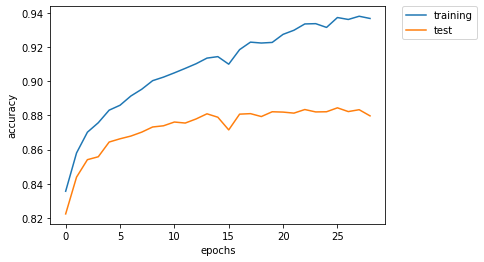

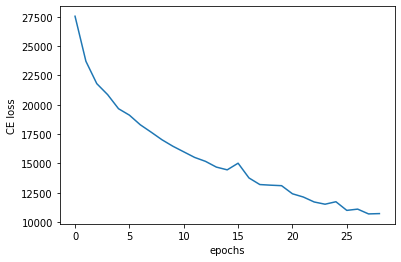

lr: 0.01
initial parameters shape:
(785, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8527


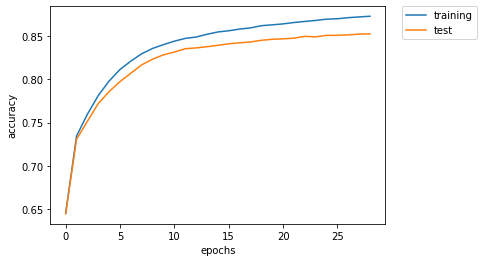

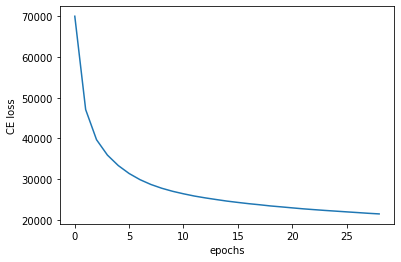

lr: 0.001
initial parameters shape:
(785, 128)
(129, 10)
max epoch: 30
test accuracy: 0.7503


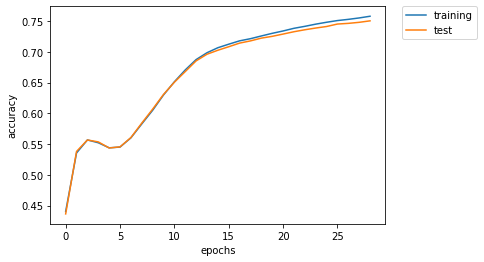

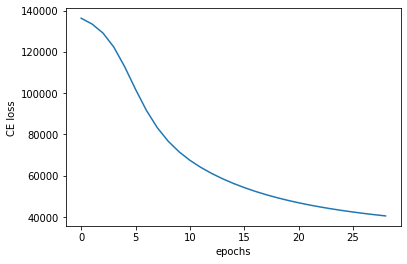

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer1=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(M=[128], add_bias=True, act_fn="relu", n_layers=1, keep_prob=1)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train, y_train, x_test, y_test, optimizer).predict(x_test)
  res_model_nlayer1.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

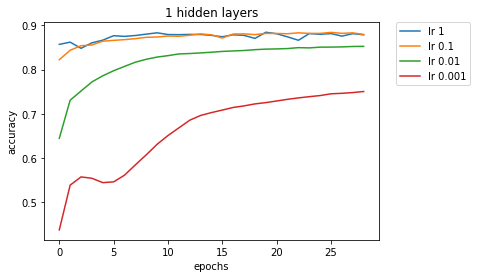

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer1[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('1 hidden layers')
plt.show()

### Model with 2 hidden layers

lr: 1
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.883


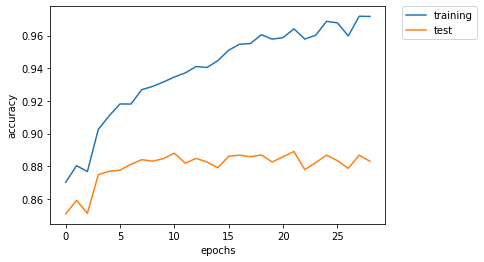

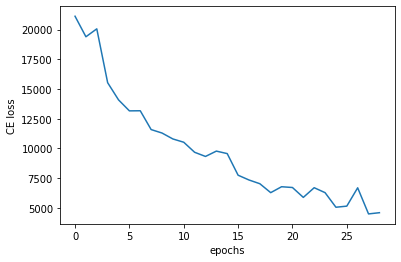

lr: 0.1
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8853


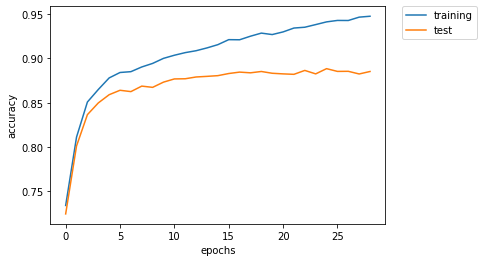

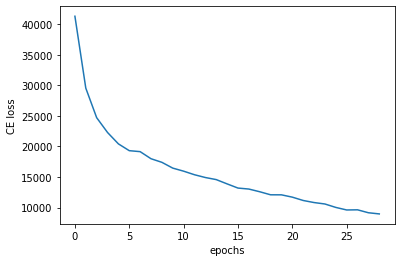

lr: 0.01
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8406


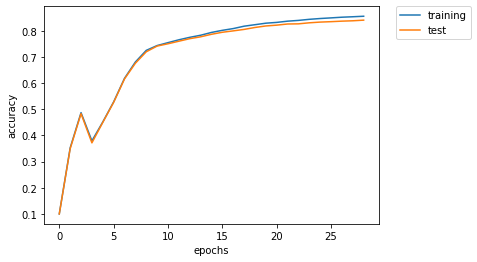

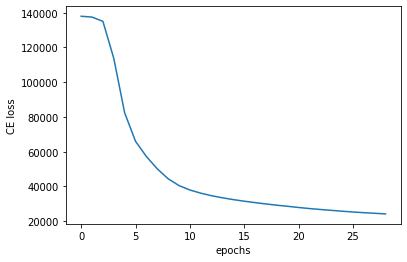

lr: 0.001
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.4711


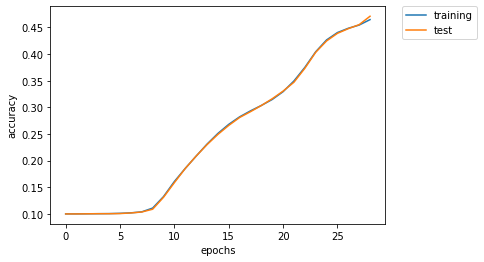

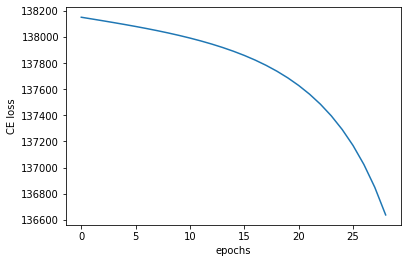

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer2=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(M=[128,128], add_bias=True, act_fn="relu", n_layers=2, keep_prob=1)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train, y_train, x_test, y_test, optimizer).predict(x_test)
  res_model_nlayer2.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

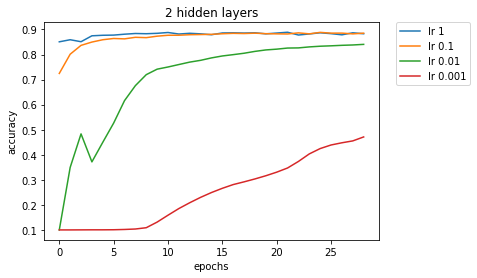

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer2[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('2 hidden layers')
plt.show()

### Comparison 

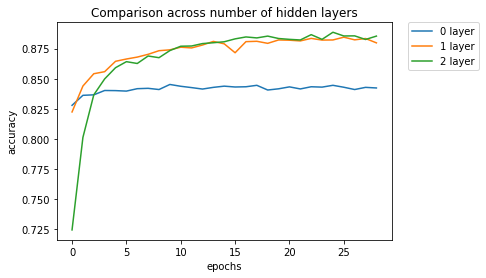

In [ ]:
plt.plot(res_model_nlayer0[1].test_accuracy, label="0 layer")
plt.plot(res_model_nlayer1[1].test_accuracy, label="1 layer")
plt.plot(res_model_nlayer2[1].test_accuracy, label="2 layer")

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison across number of hidden layers')
plt.show()

## Task 3.2

### Model with tanh for activation

lr: 1
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8718


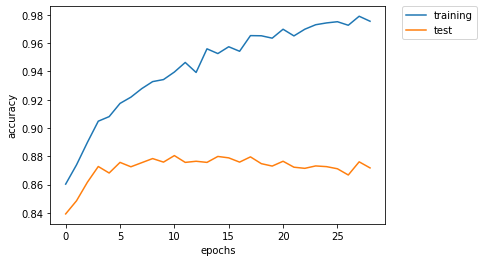

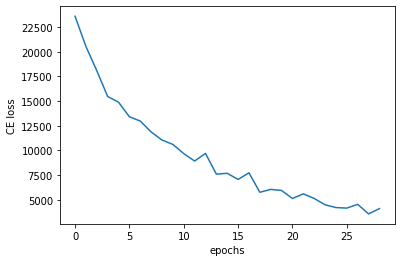

lr: 0.1
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8802


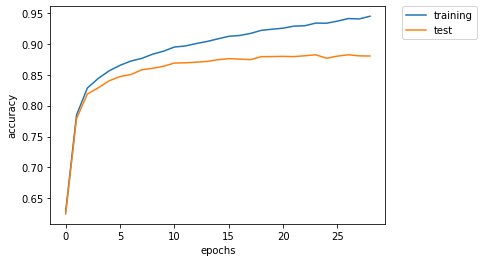

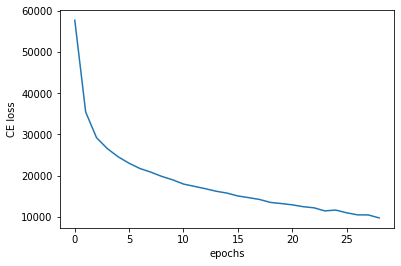

lr: 0.01
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8097


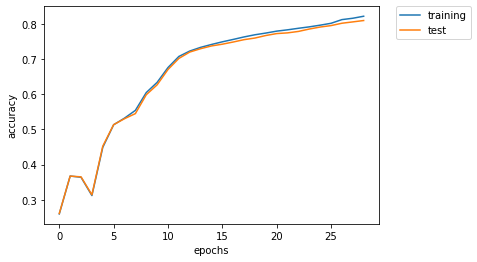

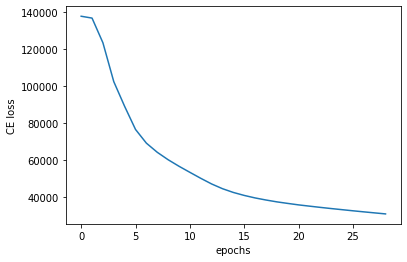

lr: 0.001
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.3088


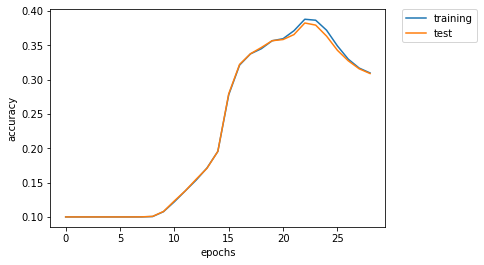

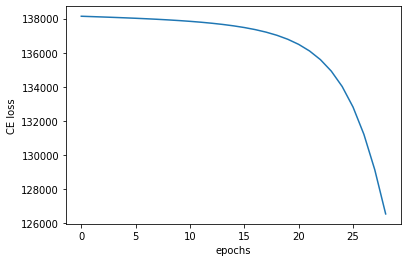

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer2_tanh=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(M=[128,128], add_bias=True, act_fn="tanh", n_layers=2, keep_prob=1)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train, y_train, x_test, y_test, optimizer).predict(x_test)
  res_model_nlayer2_tanh.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

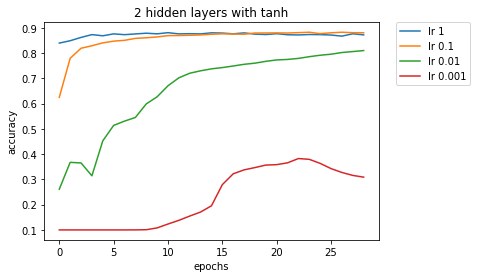

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer2_tanh[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('2 hidden layers with tanh')
plt.show()

### Model with leaky relu for activation

lr: 1
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8871


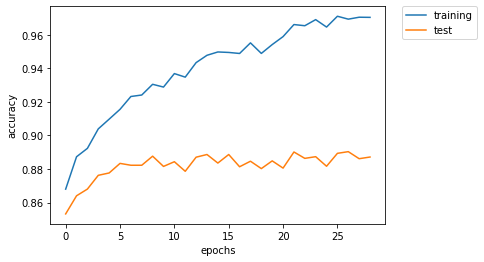

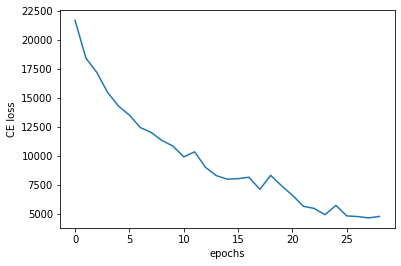

lr: 0.1
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8848


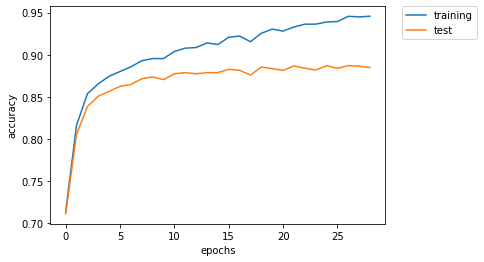

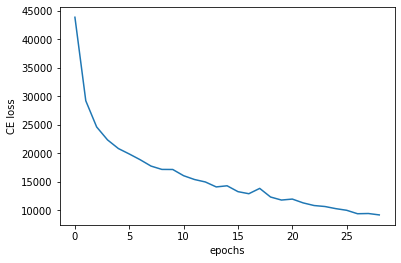

lr: 0.01
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8363


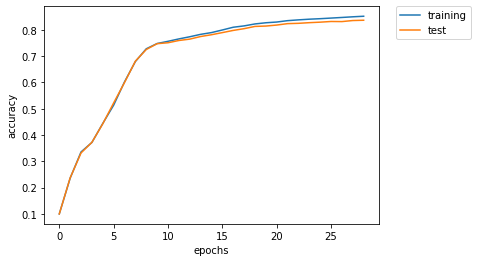

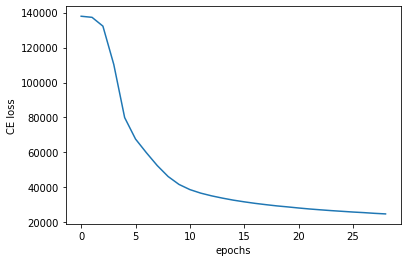

lr: 0.001
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.3705


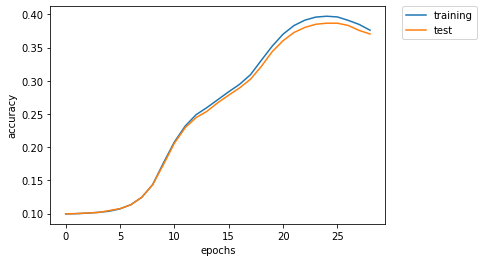

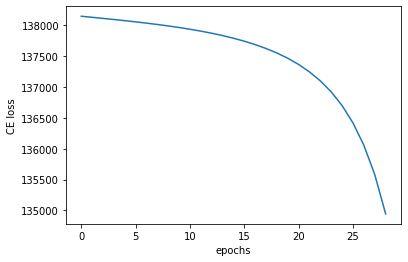

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer2_lrelu=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(M=[128,128], add_bias=True, act_fn="lrelu", n_layers=2, keep_prob=1)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train, y_train, x_test, y_test, optimizer).predict(x_test)
  res_model_nlayer2_lrelu.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

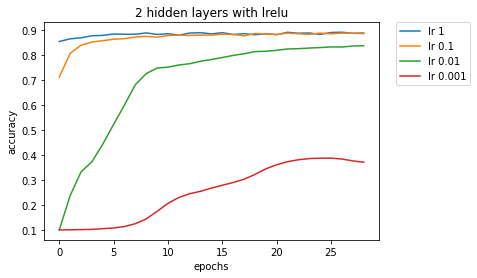

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer2_lrelu[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('2 hidden layers with lrelu')
plt.show()

### Comparison

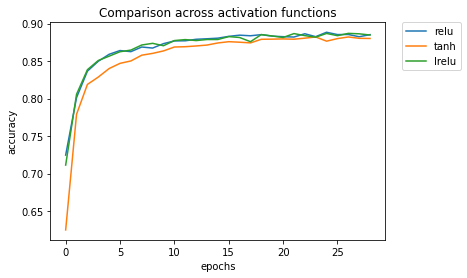

In [ ]:
plt.plot(res_model_nlayer2[1].test_accuracy, label="relu")
plt.plot(res_model_nlayer2_tanh[1].test_accuracy, label="tanh")
plt.plot(res_model_nlayer2_lrelu[1].test_accuracy, label="lrelu")

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison across activation functions')
plt.show()

## Task 3.3

### Probability of 0.25 of dropout

lr: 1
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.115


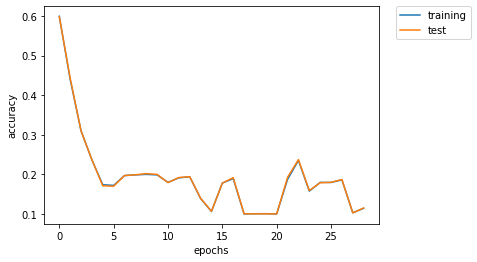

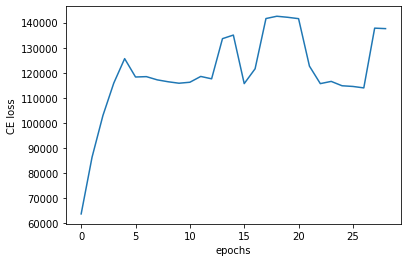

lr: 0.1
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.854


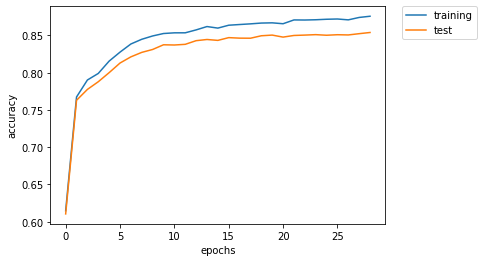

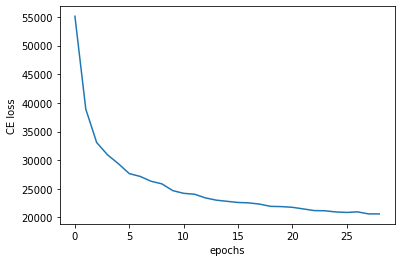

lr: 0.01
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.7752


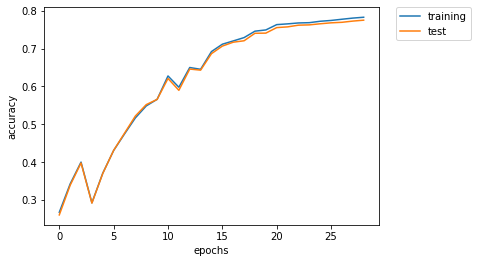

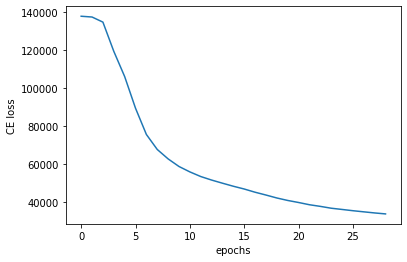

lr: 0.001
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.4775


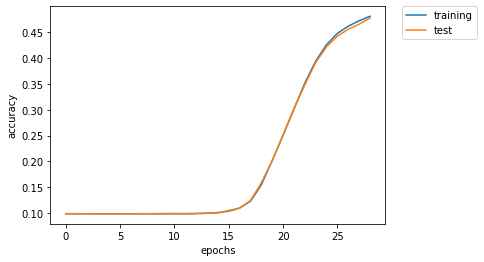

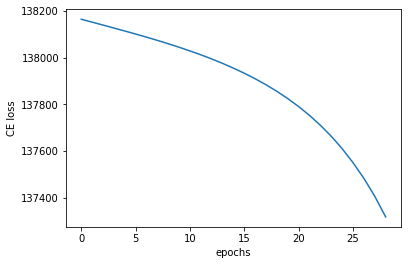

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer2_prob25=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(M=[128,128], add_bias=True, act_fn="relu", n_layers=2, keep_prob=0.25)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train, y_train, x_test, y_test, optimizer).predict(x_test)
  res_model_nlayer2_prob25.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

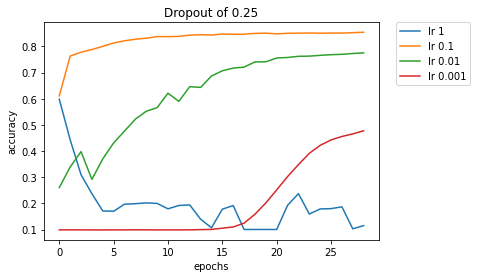

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer2_prob25[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Dropout of 0.25')
plt.show()

### Probability of 0.5 of dropout

lr: 1
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8669


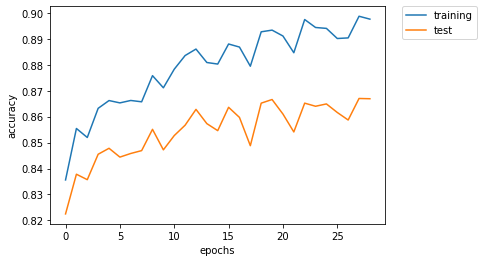

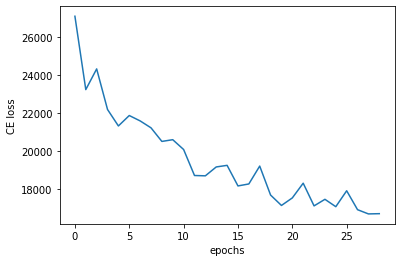

lr: 0.1
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8789


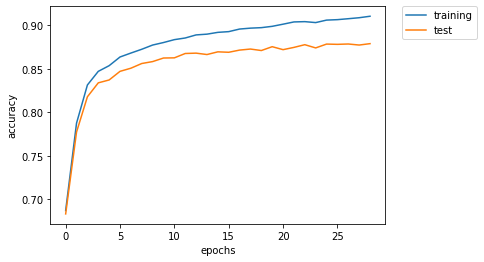

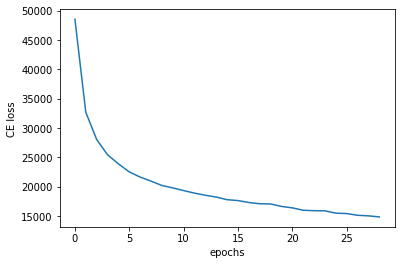

lr: 0.01
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.815


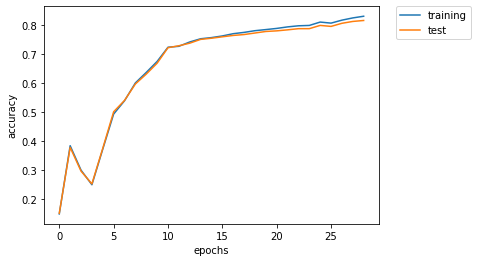

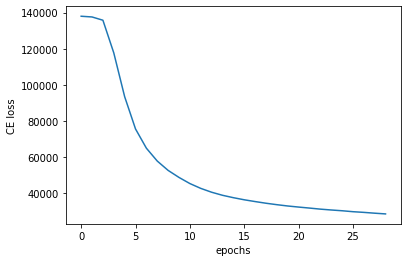

lr: 0.001
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.3925


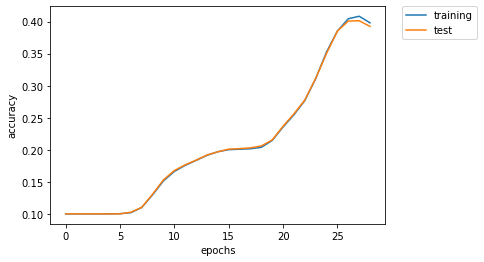

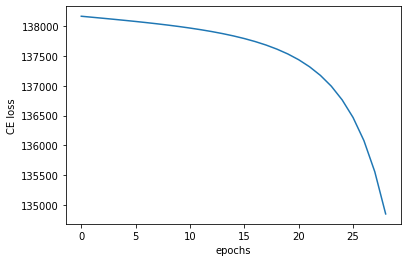

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer2_prob5=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(M=[128,128], add_bias=True, act_fn="relu", n_layers=2, keep_prob=0.5)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train, y_train, x_test, y_test, optimizer).predict(x_test)
  res_model_nlayer2_prob5.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

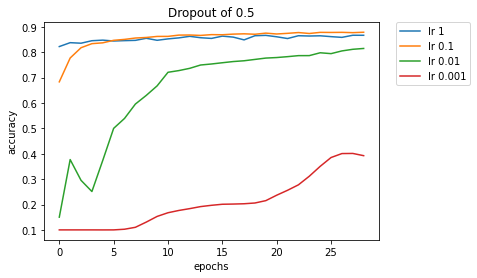

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer2_prob5[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Dropout of 0.5')
plt.show()

### Probability of 0.75 of dropout

lr: 1
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.883


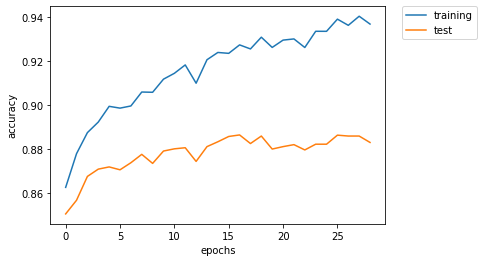

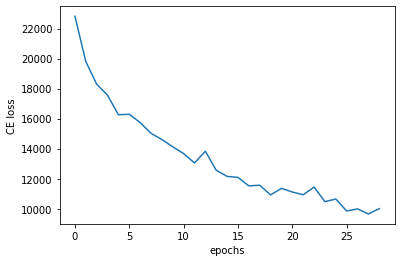

lr: 0.1
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8861


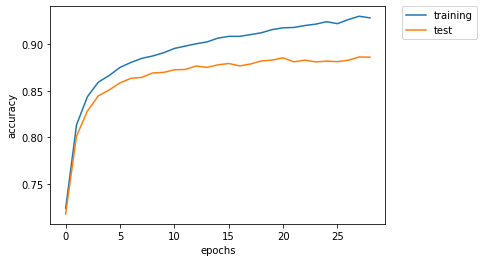

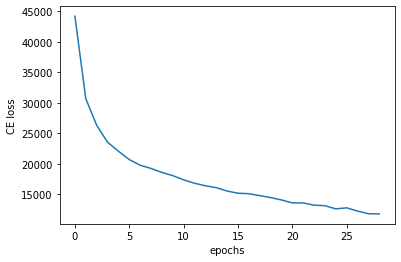

lr: 0.01
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8328


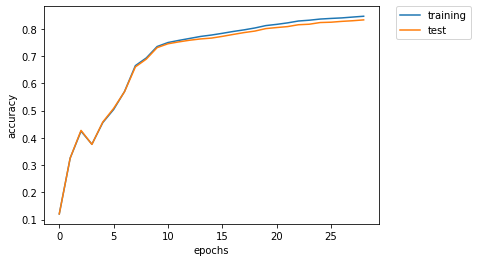

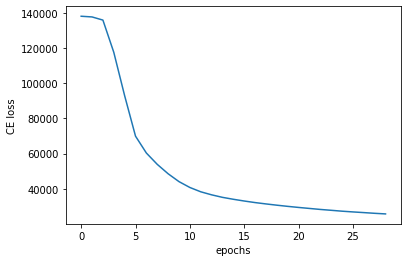

lr: 0.001
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.5003


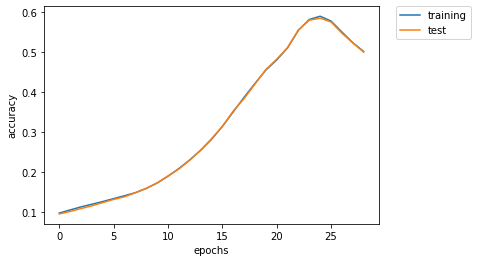

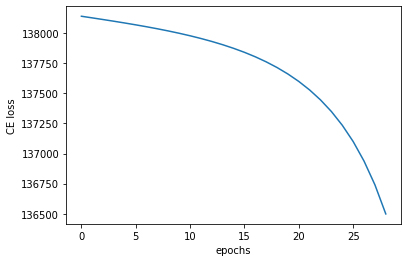

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer2_prob75=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(M=[128,128], add_bias=True, act_fn="relu", n_layers=2, keep_prob=0.75)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train, y_train, x_test, y_test, optimizer).predict(x_test)
  res_model_nlayer2_prob75.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

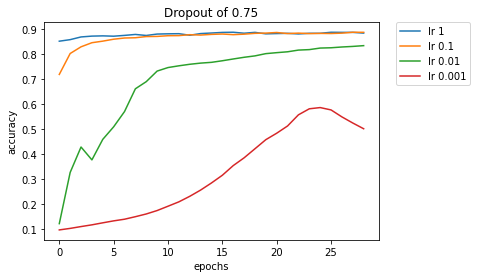

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer2_prob75[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Dropout of 0.75')
plt.show()

### Comparison

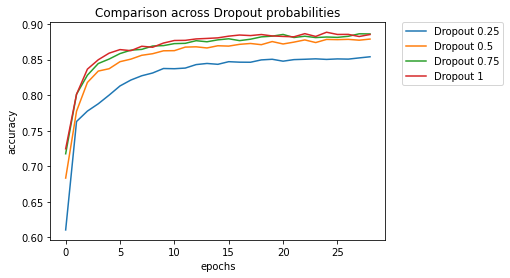

In [ ]:
plt.plot(res_model_nlayer2_prob25[1].test_accuracy, label="Dropout 0.25")
plt.plot(res_model_nlayer2_prob5[1].test_accuracy, label="Dropout 0.5")
plt.plot(res_model_nlayer2_prob75[1].test_accuracy, label="Dropout 0.75")
plt.plot(res_model_nlayer2[1].test_accuracy, label="Dropout 1")

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison across Dropout probabilities')
plt.show()

## Task 3.4

### Training with unnormalized data

lr: 1
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.1


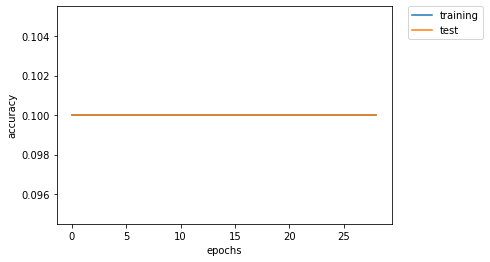

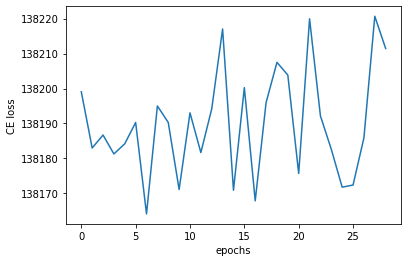

lr: 0.1
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8665


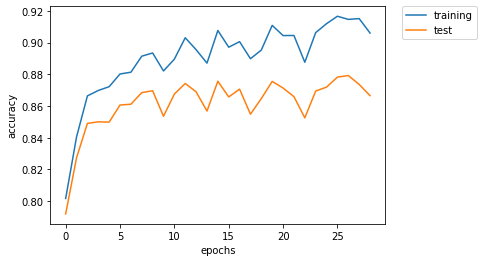

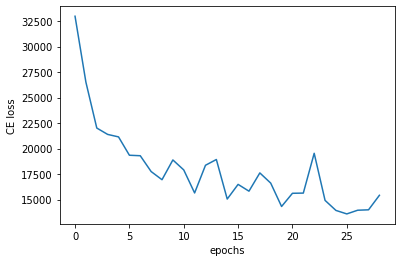

lr: 0.01
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.887


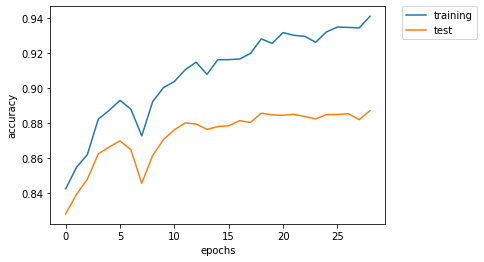

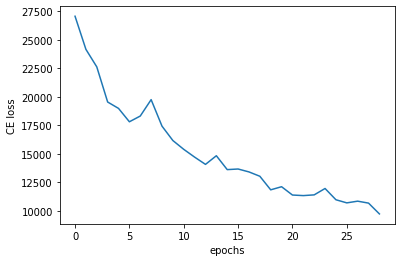

lr: 0.001
initial parameters shape:
(785, 128)
(129, 128)
(129, 10)
max epoch: 30
test accuracy: 0.8596


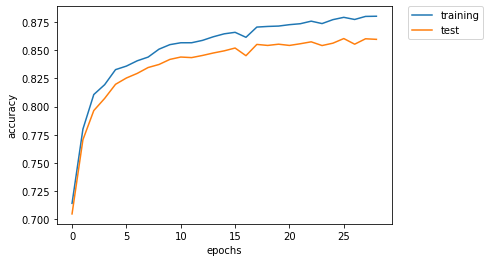

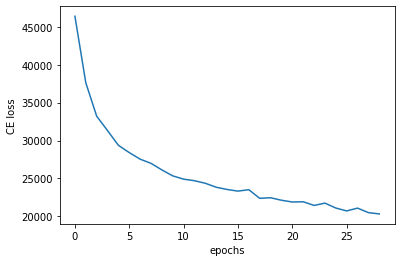

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer2_raw=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(M=[128,128], add_bias=True, act_fn="relu", n_layers=2, keep_prob=1)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train_raw, y_train, x_test_raw, y_test, optimizer).predict(x_test_raw)
  res_model_nlayer2_raw.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

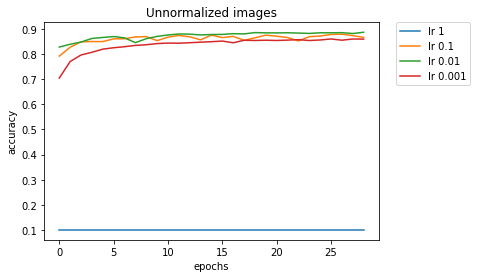

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer2_raw[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Unnormalized images')
plt.show()

### Comparison

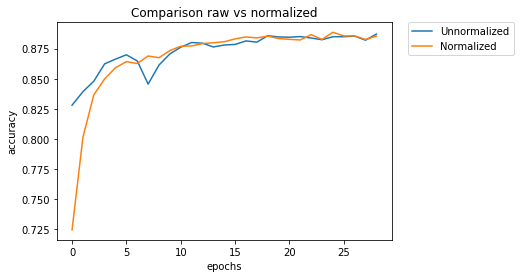

In [ ]:
plt.plot(res_model_nlayer2_raw[2].test_accuracy, label="Unnormalized")
plt.plot(res_model_nlayer2[1].test_accuracy, label="Normalized")

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison raw vs normalized')
plt.show()

## Task 3.6

### 1 layer 300 units

lr: 1
initial parameters shape:
(785, 300)
(301, 10)
max epoch: 30
test accuracy: 0.8828


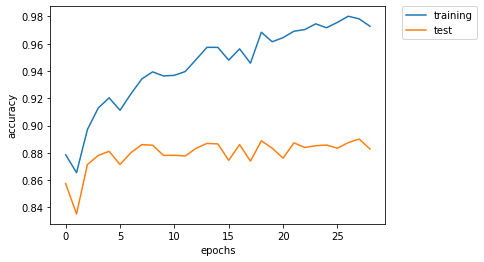

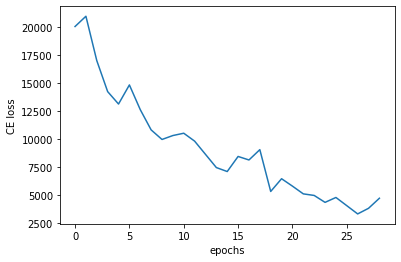

lr: 0.1
initial parameters shape:
(785, 300)
(301, 10)
max epoch: 30
test accuracy: 0.8916


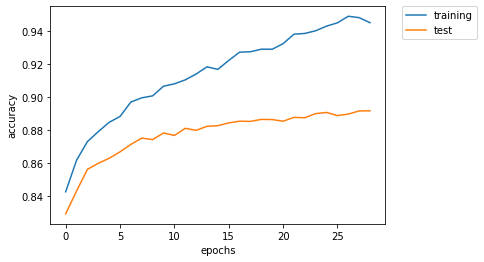

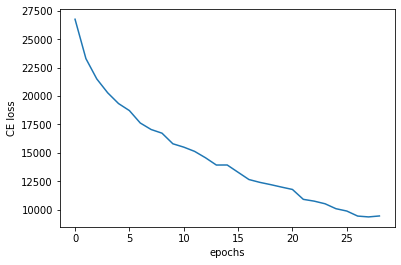

lr: 0.01
initial parameters shape:
(785, 300)
(301, 10)
max epoch: 30
test accuracy: 0.8547


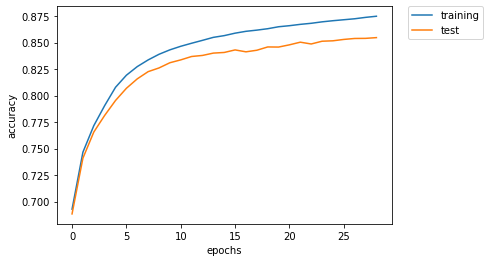

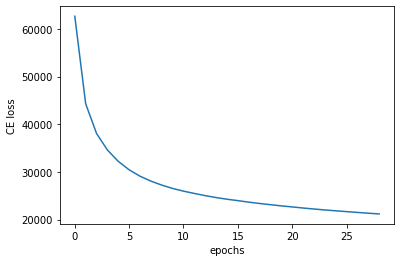

lr: 0.001
initial parameters shape:
(785, 300)
(301, 10)
max epoch: 30
test accuracy: 0.7641


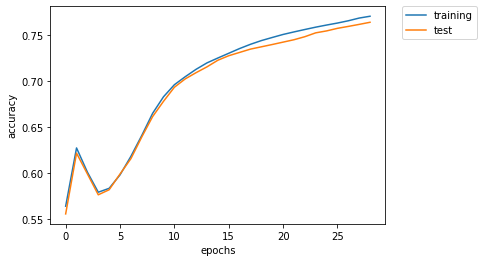

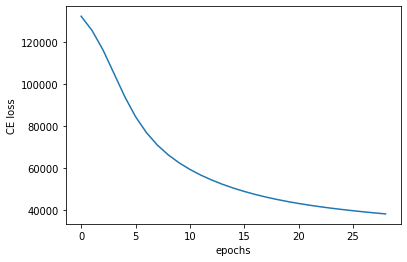

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer1_w300=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(M=[300], add_bias=True, act_fn="relu", n_layers=1, keep_prob=1)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train, y_train, x_test, y_test, optimizer).predict(x_test)
  res_model_nlayer1_w300.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

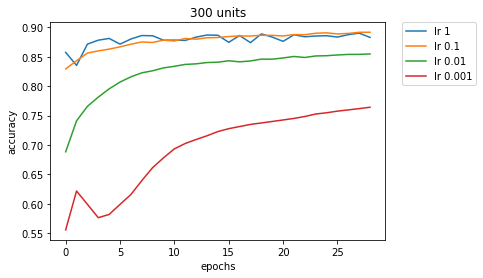

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer1_w300[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('300 units')
plt.show()

### 2 layer 10 units

lr: 1
initial parameters shape:
(785, 10)
(11, 10)
(11, 10)


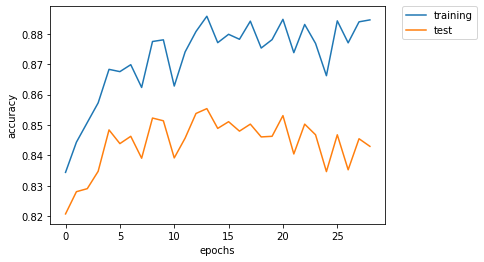

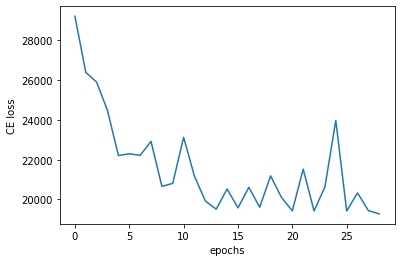

lr: 0.1
initial parameters shape:
(785, 10)
(11, 10)
(11, 10)
max epoch: 30
test accuracy: 0.853


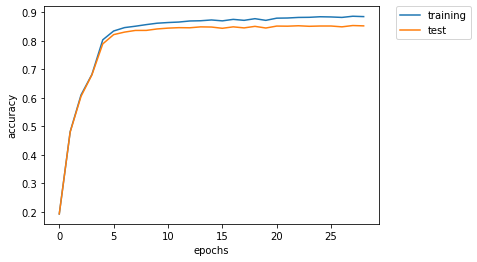

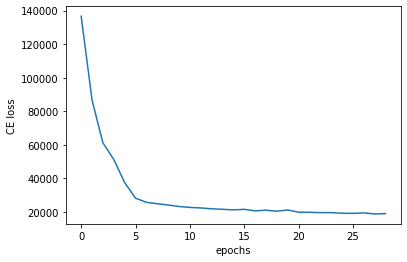

lr: 0.01
initial parameters shape:
(785, 10)
(11, 10)
(11, 10)
max epoch: 30
test accuracy: 0.7247


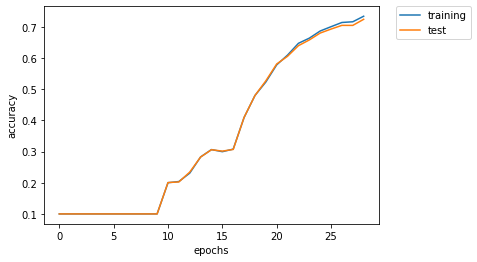

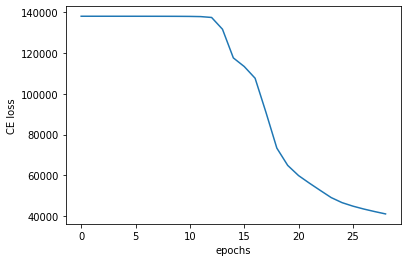

lr: 0.001
initial parameters shape:
(785, 10)
(11, 10)
(11, 10)
max epoch: 30
test accuracy: 0.1


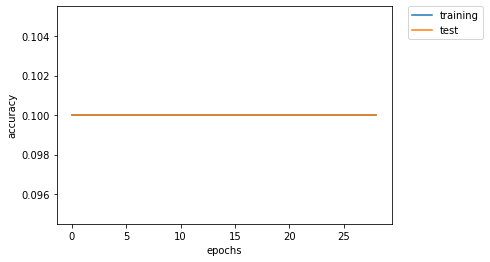

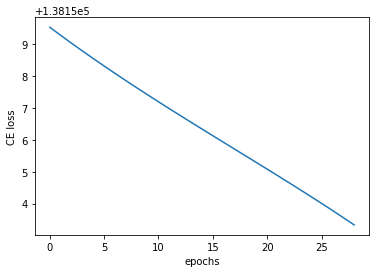

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer2_w10=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(M=[10,10], add_bias=True, act_fn="relu", n_layers=2, keep_prob=1)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train, y_train, x_test, y_test, optimizer).predict(x_test)
  res_model_nlayer2_w10.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

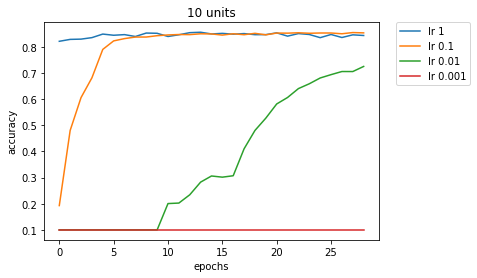

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer2_w10[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('10 units')
plt.show()

### 2 layer 30 units

lr: 1
initial parameters shape:
(785, 30)
(31, 30)
(31, 10)
max epoch: 30
test accuracy: 0.8639


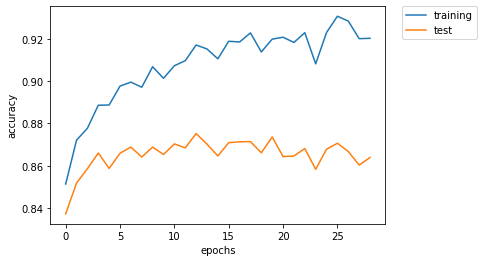

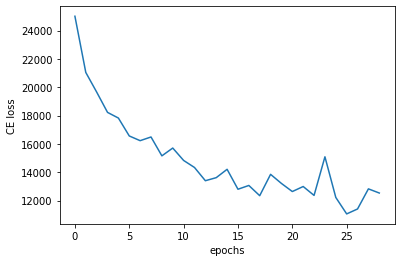

lr: 0.1
initial parameters shape:
(785, 30)
(31, 30)
(31, 10)
max epoch: 30
test accuracy: 0.8744


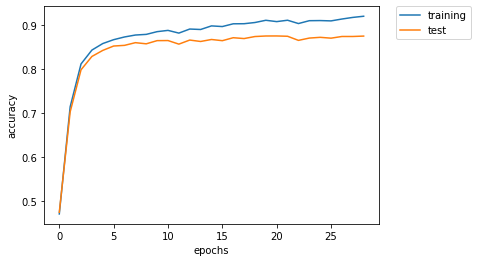

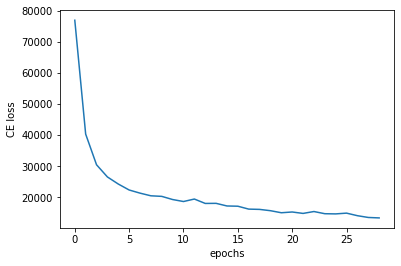

lr: 0.01
initial parameters shape:
(785, 30)
(31, 30)
(31, 10)
max epoch: 30
test accuracy: 0.7867


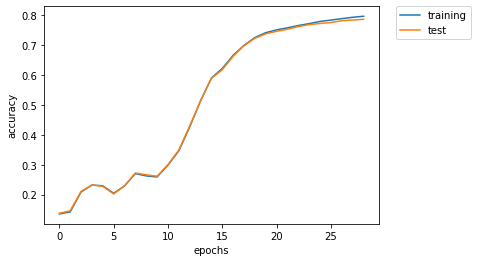

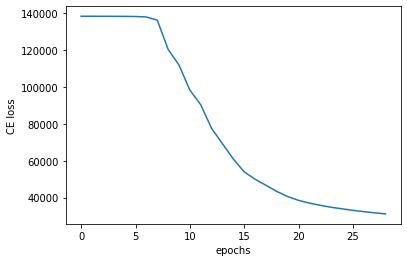

lr: 0.001
initial parameters shape:
(785, 30)
(31, 30)
(31, 10)
max epoch: 30
test accuracy: 0.1


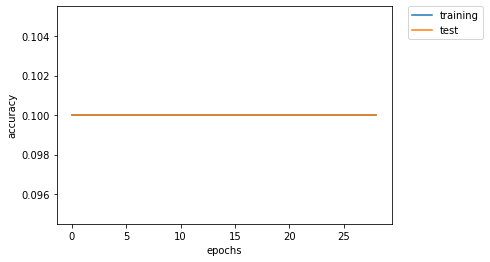

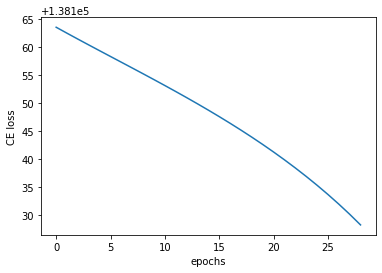

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer2_w30=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(M=[30,30], add_bias=True, act_fn="relu", n_layers=2, keep_prob=1)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train, y_train, x_test, y_test, optimizer).predict(x_test)
  res_model_nlayer2_w30.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

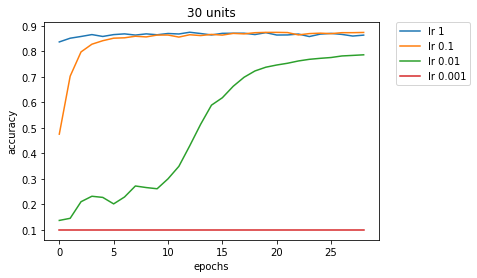

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer2_w30[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('30 units')
plt.show()

### 2 layer 200 units

lr: 1
initial parameters shape:
(785, 200)
(201, 200)
(201, 10)
max epoch: 30
test accuracy: 0.8907


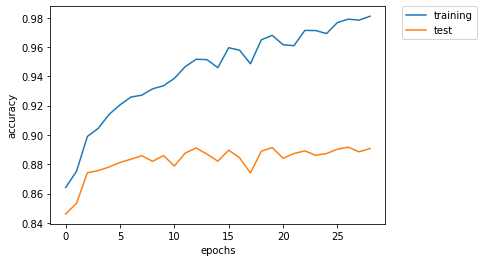

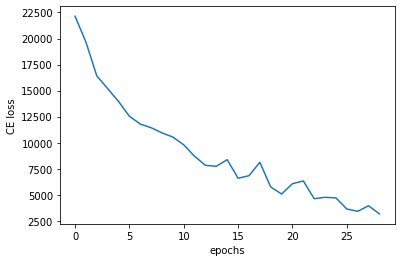

lr: 0.1
initial parameters shape:
(785, 200)
(201, 200)
(201, 10)
max epoch: 30
test accuracy: 0.8837


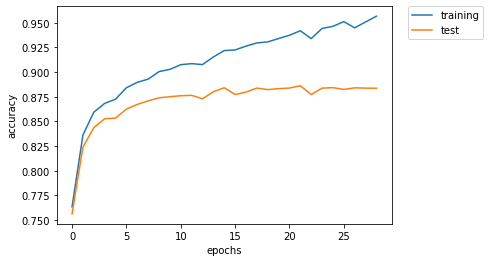

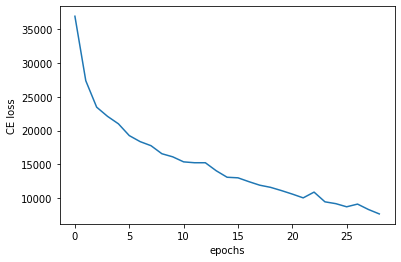

lr: 0.01
initial parameters shape:
(785, 200)
(201, 200)
(201, 10)
max epoch: 30
test accuracy: 0.8439


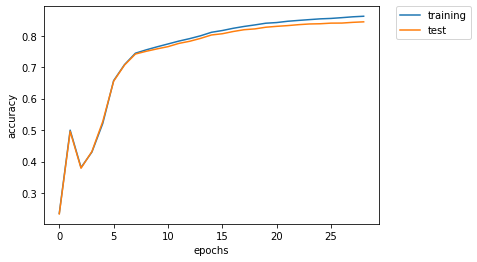

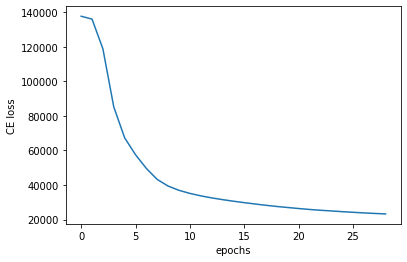

lr: 0.001
initial parameters shape:
(785, 200)
(201, 200)
(201, 10)
max epoch: 30
test accuracy: 0.3503


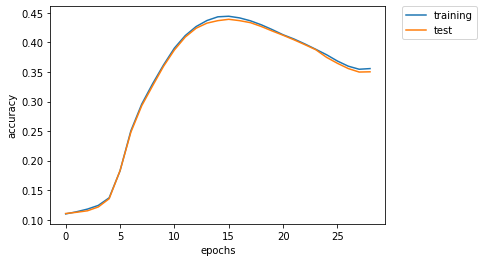

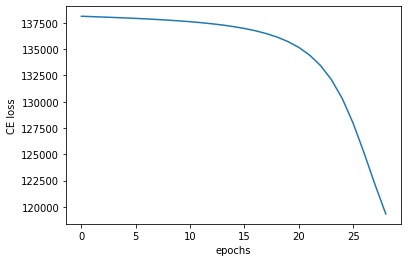

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer2_w200=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(M=[200,200], add_bias=True, act_fn="relu", n_layers=2, keep_prob=1)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train, y_train, x_test, y_test, optimizer).predict(x_test)
  res_model_nlayer2_w200.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

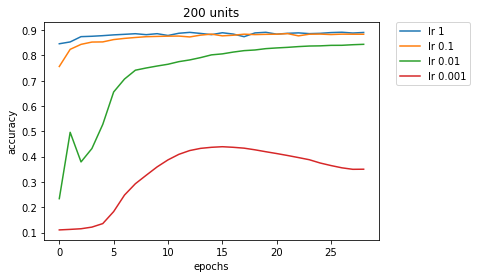

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer2_w200[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('200 units')
plt.show()

### 2 layer 128,10 units

lr: 1
initial parameters shape:
(785, 128)
(129, 10)
(11, 10)
max epoch: 30
test accuracy: 0.8768


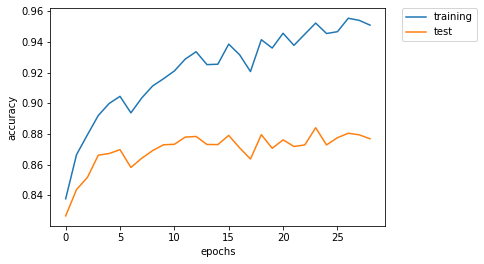

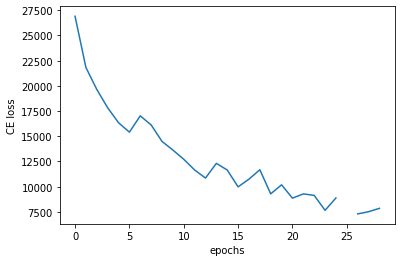

lr: 0.1
initial parameters shape:
(785, 128)
(129, 10)
(11, 10)
max epoch: 30
test accuracy: 0.8749


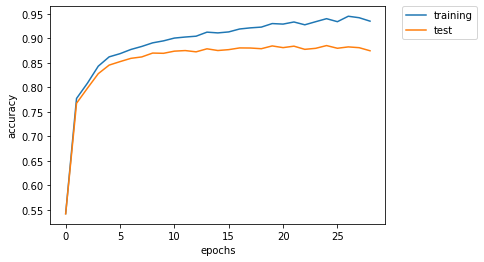

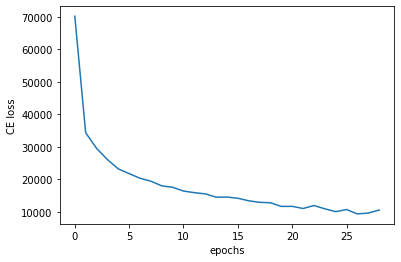

lr: 0.01
initial parameters shape:
(785, 128)
(129, 10)
(11, 10)
max epoch: 30
test accuracy: 0.8011


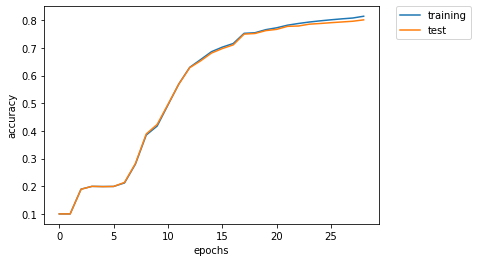

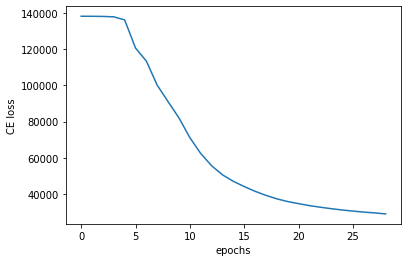

lr: 0.001
initial parameters shape:
(785, 128)
(129, 10)
(11, 10)
max epoch: 30
test accuracy: 0.1306


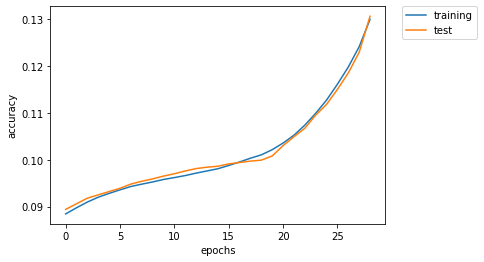

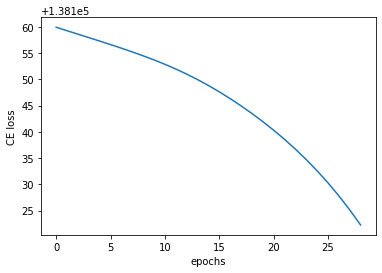

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer2_w128_w10=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(M=[128,10], add_bias=True, act_fn="relu", n_layers=2, keep_prob=1)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train, y_train, x_test, y_test, optimizer).predict(x_test)
  res_model_nlayer2_w128_w10.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

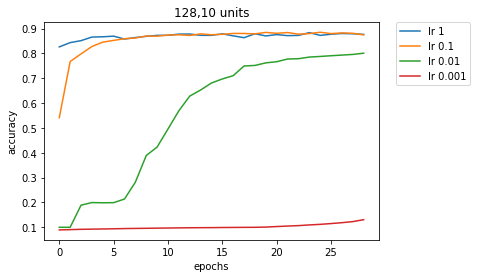

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer2_w128_w10[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('128,10 units')
plt.show()

### 2 layer 300 units

lr: 1
initial parameters shape:
(785, 300)
(301, 300)
(301, 10)
max epoch: 30
test accuracy: 0.8825


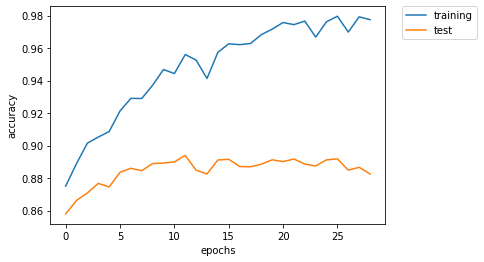

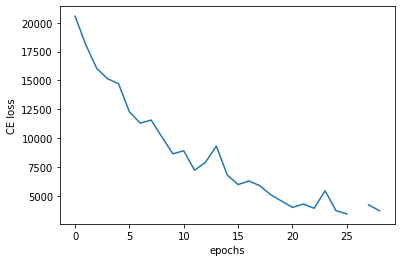

lr: 0.1
initial parameters shape:
(785, 300)
(301, 300)
(301, 10)
max epoch: 30
test accuracy: 0.8864


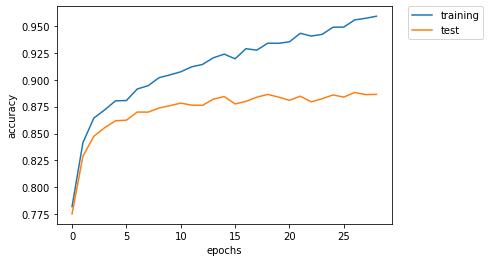

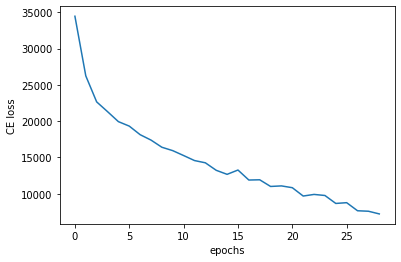

lr: 0.01
initial parameters shape:
(785, 300)
(301, 300)
(301, 10)
max epoch: 30
test accuracy: 0.8495


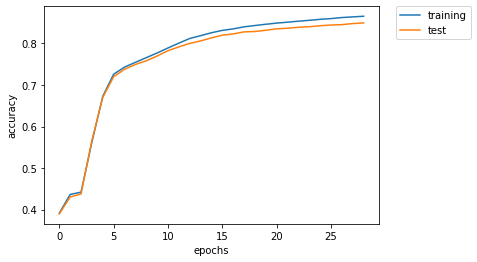

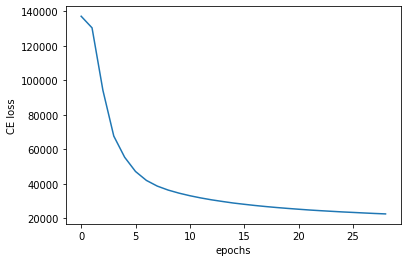

lr: 0.001
initial parameters shape:
(785, 300)
(301, 300)
(301, 10)
max epoch: 30
test accuracy: 0.4241


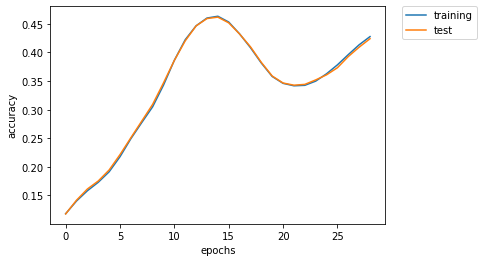

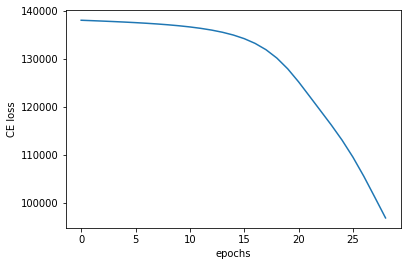

In [ ]:
lrs=[1,1e-1, 1e-2, 1e-3]
res_model_nlayer2_w300=[]

for lr in lrs:
  print('lr: '+str(lr))
  model = MLP(M=[300,300], add_bias=True, act_fn="relu", n_layers=2, keep_prob=1)
  optimizer = SGD(learning_rate=lr, momentum=0.9, max_iters=30, batch_size=32)
  yh=model.fit(x_train, y_train, x_test, y_test, optimizer).predict(x_test)
  res_model_nlayer2_w300.append(model)
  print('test accuracy: ' + str(evaluate_acc(np.argmax(y_test, axis=1), yh)))

  plt.plot(model.training_accuracy, label="training")
  plt.plot(model.test_accuracy, label="test")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

  plt.plot(model.loss)
  plt.xlabel('epochs')
  plt.ylabel('CE loss')
  plt.show()

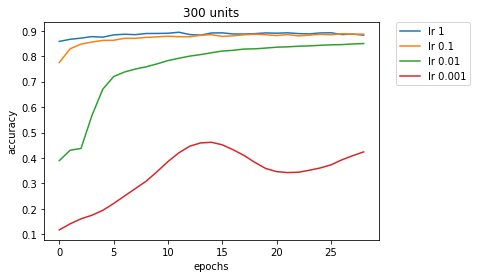

In [ ]:
for i in range(len(lrs)):
  lr=lrs[i]
  model=res_model_nlayer2_w300[i]
  label_use='lr ' + str(lr)
  plt.plot(model.test_accuracy, label=label_use)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('300 units')
plt.show()

### Comparison

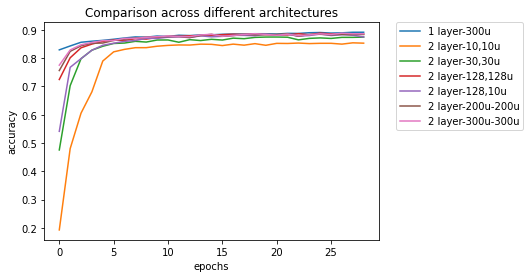

In [ ]:
plt.plot(res_model_nlayer1_w300[1].test_accuracy, label="1 layer-300u")
plt.plot(res_model_nlayer2_w10[1].test_accuracy, label="2 layer-10,10u")
plt.plot(res_model_nlayer2_w30[1].test_accuracy, label="2 layer-30,30u")
plt.plot(res_model_nlayer2[1].test_accuracy, label="2 layer-128,128u")
plt.plot(res_model_nlayer2_w128_w10[1].test_accuracy, label="2 layer-128,10u")
plt.plot(res_model_nlayer2_w200[1].test_accuracy, label="2 layer-200u-200u")
plt.plot(res_model_nlayer2_w300[1].test_accuracy, label="2 layer-300u-300u")


plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison across different architectures')
plt.show()

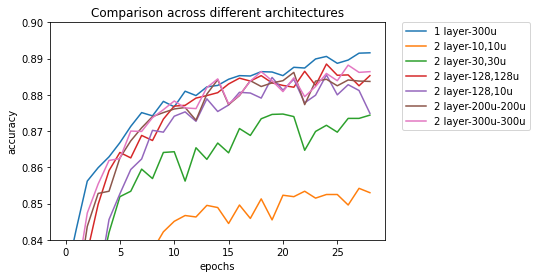

In [ ]:
plt.plot(res_model_nlayer1_w300[1].test_accuracy, label="1 layer-300u")
plt.plot(res_model_nlayer2_w10[1].test_accuracy, label="2 layer-10,10u")
plt.plot(res_model_nlayer2_w30[1].test_accuracy, label="2 layer-30,30u")
plt.plot(res_model_nlayer2[1].test_accuracy, label="2 layer-128,128u")
plt.plot(res_model_nlayer2_w128_w10[1].test_accuracy, label="2 layer-128,10u")
plt.plot(res_model_nlayer2_w200[1].test_accuracy, label="2 layer-200u-200u")
plt.plot(res_model_nlayer2_w300[1].test_accuracy, label="2 layer-300u-300u")


x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0.84,0.9))

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison across different architectures')
plt.show()